# Discretization And Binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Let’s divide these into bins of 18 to 25, 26 to 35, 36 to 60, and finally 61 and older.

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [ ]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [ ]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

A closely related function, qcut, bins the data based on sample quantiles.

In [ ]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
cats

[(-2.8209999999999997, -0.577], (0.0466, 0.688], (0.688, 3.037], (-0.577, 0.0466], (-0.577, 0.0466], ..., (0.688, 3.037], (0.688, 3.037], (-0.577, 0.0466], (0.688, 3.037], (-0.577, 0.0466]]
Length: 1000
Categories (4, interval[float64]): [(-2.8209999999999997, -0.577] < (-0.577, 0.0466] < (0.0466, 0.688] < (0.688, 3.037]]

In [ ]:
pd.value_counts(cats)

(0.688, 3.037]                   250
(0.0466, 0.688]                  250
(-0.577, 0.0466]                 250
(-2.8209999999999997, -0.577]    250
dtype: int64

# Outlier Detection

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\Data Analytics\\Height.txt")
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


### Set a threshold value eg. 0.95

In [ ]:
max_thresold = df['height'].quantile(0.95)
max_thresold

9.689999999999998

In [ ]:
## Finding out values greater than threshold

In [ ]:
df[df['height']>max_thresold]


,name,height
9,imran,14.5


In [ ]:
# Set a Min threshold Value

In [ ]:
min_thresold = df['height'].quantile(0.05)
min_thresold

3.6050000000000004

In [ ]:
df[df['height']<min_thresold]


,name,height
12,yoseph,1.2


In [ ]:
# Filter data set with min and max threshold

In [ ]:
df[(df['height']<max_thresold) & (df['height']>min_thresold)]


,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [ ]:
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\Data Analytics\\Data.csv.txt")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
df.shape


(13200, 7)

In [ ]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [ ]:
min_thresold, max_thresold = df.price_per_sqft.quantile([0.001, 0.999])
min_thresold, max_thresold


(1366.184, 50959.36200000099)

In [ ]:
df[df.price_per_sqft < min_thresold]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [ ]:
df[df.price_per_sqft > max_thresold]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [ ]:
df2 = df[(df.price_per_sqft<max_thresold) & (df.price_per_sqft>min_thresold)]
df2.shape


(13172, 7)

In [ ]:
df2.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()


In [ ]:
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


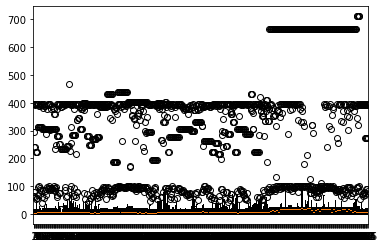

In [ ]:
plt.boxplot(boston_df) 
plt.show()

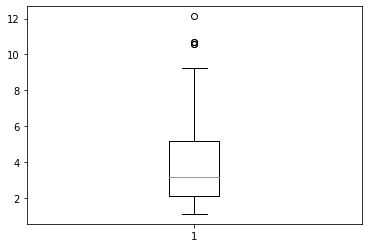

In [ ]:
import matplotlib.pyplot as plt 

plt.boxplot(boston_df['DIS']) 
plt.show()

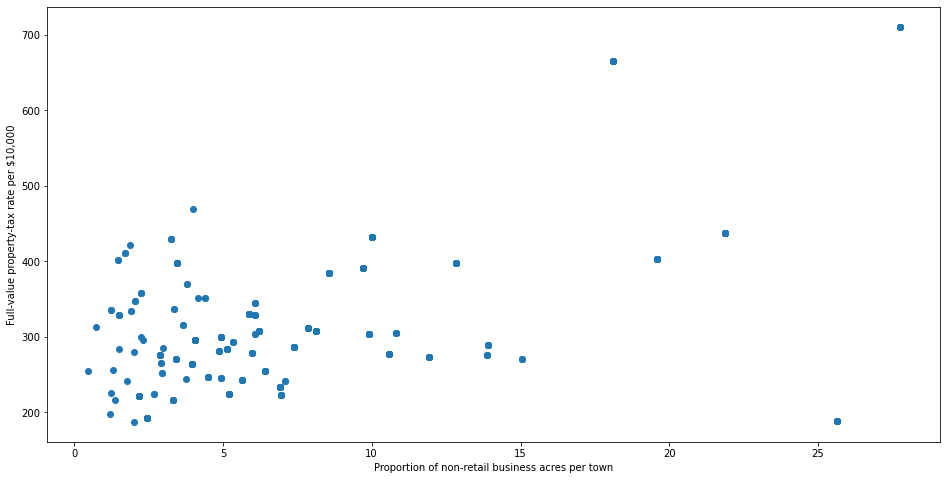

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [ ]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [ ]:
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [ ]:
boston_df_o = boston_df[(z < 3).all(axis=1)]


In [ ]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)